In [138]:
import numpy as np 
import pandas as pd 
import pysindy as ps
import matplotlib.pyplot as plt

from matplotlib import style
style.use('seaborn-white')

from urllib.request import urlopen
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

In [139]:
df_Asta = pd.read_csv('ResearchUpdate#43/AllResults/NapoliResults.csv', header=None, sep=',', low_memory=False, encoding='UTF-8')
df_Asta = df_Asta.rename(columns={0:"A_Optimized",1:"V_Optimized",2:"S_Optimized"})
df_Asta = pd.DataFrame(df_Asta)

In [140]:
df_Asta.head(11)

,A_Optimized,V_Optimized,S_Optimized
0,0.700,0.462,0.495
1,5.010,0.358,0.397
2,194.050,1.450,1.067
3,0.821,0.519,0.476
4,5.980,0.472,0.422
5,67.420,1.280,1.630
6,0.662,0.494,0.519
7,2.890,0.412,0.441
8,78.100,1.190,1.051
9,0.618,0.636,0.612


In [141]:
A_Optimized = np.asarray(df_Asta['A_Optimized'])
V_Optimized = np.asarray(df_Asta['V_Optimized'])
S_Optimized = np.asarray(df_Asta['S_Optimized'])

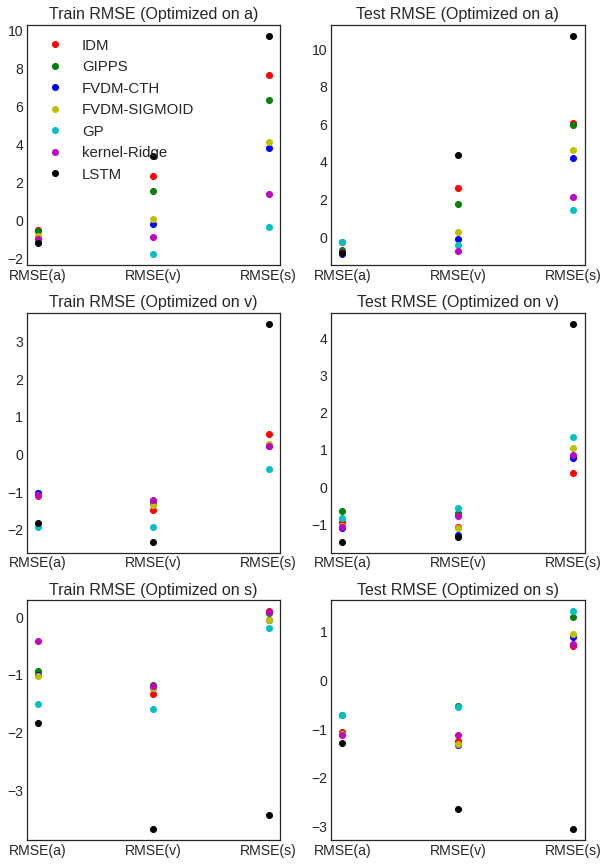

In [142]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)

fig.set_figheight(15)
fig.set_figwidth(10)

x = ['RMSE(a)', 'RMSE(v)', 'RMSE(s)']

r1, = ax1.plot(x, np.log2(A_Optimized[0:3]), 'ro')
g1, = ax1.plot(x, np.log2(A_Optimized[6:9]), 'go')
b1, = ax1.plot(x, np.log2(A_Optimized[12:15]), 'bo')
y1, = ax1.plot(x, np.log2(A_Optimized[18:21]), 'yo')
c1, = ax1.plot(x, np.log2(A_Optimized[24:27]), 'co')
m1, = ax1.plot(x, np.log2(A_Optimized[30:33]), 'mo')
k1, = ax1.plot(x, np.log2(A_Optimized[36:39]), 'ko')
ax1.set_title('Train RMSE (Optimized on a)')

r1, = ax2.plot(x, np.log2(A_Optimized[3:6]), 'ro')
g1, = ax2.plot(x, np.log2(A_Optimized[9:12]), 'go')
b1, = ax2.plot(x, np.log2(A_Optimized[15:18]), 'bo')
y1, = ax2.plot(x, np.log2(A_Optimized[21:24]), 'yo')
c1, = ax2.plot(x, np.log2(A_Optimized[27:30]), 'co')
m1, = ax2.plot(x, np.log2(A_Optimized[33:36]), 'mo')
k1, = ax2.plot(x, np.log2(A_Optimized[39:42]), 'ko')
ax2.set_title('Test RMSE (Optimized on a)')

r1, = ax3.plot(x, np.log2(V_Optimized[0:3]), 'ro')
g1, = ax3.plot(x, np.log2(V_Optimized[6:9]), 'go')
b1, = ax3.plot(x, np.log2(V_Optimized[12:15]), 'bo')
y1, = ax3.plot(x, np.log2(V_Optimized[18:21]), 'yo')
c1, = ax3.plot(x, np.log2(V_Optimized[24:27]), 'co')
m1, = ax3.plot(x, np.log2(V_Optimized[30:33]), 'mo')
k1, = ax3.plot(x, np.log2(V_Optimized[36:39]), 'ko')
ax3.set_title('Train RMSE (Optimized on v)')

r1, = ax4.plot(x, np.log2(V_Optimized[3:6]), 'ro')
g1, = ax4.plot(x, np.log2(V_Optimized[9:12]), 'go')
b1, = ax4.plot(x, np.log2(V_Optimized[15:18]), 'bo')
y1, = ax4.plot(x, np.log2(V_Optimized[21:24]), 'yo')
c1, = ax4.plot(x, np.log2(V_Optimized[27:30]), 'co')
m1, = ax4.plot(x, np.log2(V_Optimized[33:36]), 'mo')
k1, = ax4.plot(x, np.log2(V_Optimized[39:42]), 'ko')
ax4.set_title('Test RMSE (Optimized on v)')

r1, = ax5.plot(x, np.log2(S_Optimized[0:3]), 'ro')
g1, = ax5.plot(x, np.log2(S_Optimized[6:9]), 'go')
b1, = ax5.plot(x, np.log2(S_Optimized[12:15]), 'bo')
y1, = ax5.plot(x, np.log2(S_Optimized[18:21]), 'yo')
c1, = ax5.plot(x, np.log2(S_Optimized[24:27]), 'co')
m1, = ax5.plot(x, np.log2(S_Optimized[30:33]), 'mo')
k1, = ax5.plot(x, np.log2(S_Optimized[36:39]), 'ko')
ax5.set_title('Train RMSE (Optimized on s)')

r1, = ax6.plot(x, np.log2(S_Optimized[3:6]), 'ro')
g1, = ax6.plot(x, np.log2(S_Optimized[9:12]), 'go')
b1, = ax6.plot(x, np.log2(S_Optimized[15:18]), 'bo')
y1, = ax6.plot(x, np.log2(S_Optimized[21:24]), 'yo')
c1, = ax6.plot(x, np.log2(S_Optimized[27:30]), 'co')
m1, = ax6.plot(x, np.log2(S_Optimized[33:36]), 'mo')
k1, = ax6.plot(x, np.log2(S_Optimized[39:42]), 'ko')
ax6.set_title('Test RMSE (Optimized on s)')

ax1.legend((r1, g1, b1, y1, c1, m1, k1), ('IDM','GIPPS' ,'FVDM-CTH' ,'FVDM-SIGMOID', 'GP', 'kernel-Ridge', 'LSTM'), loc='upper left', shadow=False)

plt.show()

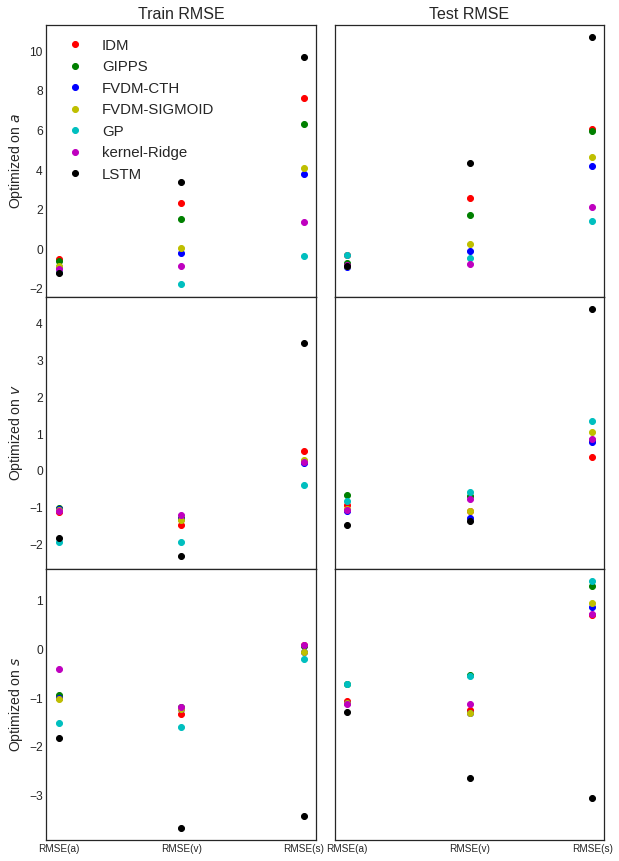

In [143]:
fontSize = 12
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontSize)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig = plt.figure()
gs = fig.add_gridspec(3, 2, hspace=0, wspace=0.07)

(ax1, ax2), (ax3, ax4), (ax5, ax6) = gs.subplots(sharex='col', sharey='row')

fig.set_figheight(15)
fig.set_figwidth(10)

x = ['RMSE(a)', 'RMSE(v)', 'RMSE(s)']

r1, = ax1.plot(x, np.log2(A_Optimized[0:3]), 'ro')
g1, = ax1.plot(x, np.log2(A_Optimized[6:9]), 'go')
b1, = ax1.plot(x, np.log2(A_Optimized[12:15]), 'bo')
y1, = ax1.plot(x, np.log2(A_Optimized[18:21]), 'yo')
c1, = ax1.plot(x, np.log2(A_Optimized[24:27]), 'co')
m1, = ax1.plot(x, np.log2(A_Optimized[30:33]), 'mo')
k1, = ax1.plot(x, np.log2(A_Optimized[36:39]), 'ko')
ax1.set_title('Train RMSE')
ax1.set(ylabel='Optimized on $a$')

r1, = ax2.plot(x, np.log2(A_Optimized[3:6]), 'ro')
g1, = ax2.plot(x, np.log2(A_Optimized[9:12]), 'go')
b1, = ax2.plot(x, np.log2(A_Optimized[15:18]), 'bo')
y1, = ax2.plot(x, np.log2(A_Optimized[21:24]), 'yo')
c1, = ax2.plot(x, np.log2(A_Optimized[27:30]), 'co')
m1, = ax2.plot(x, np.log2(A_Optimized[33:36]), 'mo')
k1, = ax2.plot(x, np.log2(A_Optimized[39:42]), 'ko')
ax2.set_title('Test RMSE')

r1, = ax3.plot(x, np.log2(V_Optimized[0:3]), 'ro')
g1, = ax3.plot(x, np.log2(V_Optimized[6:9]), 'go')
b1, = ax3.plot(x, np.log2(V_Optimized[12:15]), 'bo')
y1, = ax3.plot(x, np.log2(V_Optimized[18:21]), 'yo')
c1, = ax3.plot(x, np.log2(V_Optimized[24:27]), 'co')
m1, = ax3.plot(x, np.log2(V_Optimized[30:33]), 'mo')
k1, = ax3.plot(x, np.log2(V_Optimized[36:39]), 'ko')
ax3.set(ylabel='Optimized on $v$')

r1, = ax4.plot(x, np.log2(V_Optimized[3:6]), 'ro')
g1, = ax4.plot(x, np.log2(V_Optimized[9:12]), 'go')
b1, = ax4.plot(x, np.log2(V_Optimized[15:18]), 'bo')
y1, = ax4.plot(x, np.log2(V_Optimized[21:24]), 'yo')
c1, = ax4.plot(x, np.log2(V_Optimized[27:30]), 'co')
m1, = ax4.plot(x, np.log2(V_Optimized[33:36]), 'mo')
k1, = ax4.plot(x, np.log2(V_Optimized[39:42]), 'ko')

r1, = ax5.plot(x, np.log2(S_Optimized[0:3]), 'ro')
g1, = ax5.plot(x, np.log2(S_Optimized[6:9]), 'go')
b1, = ax5.plot(x, np.log2(S_Optimized[12:15]), 'bo')
y1, = ax5.plot(x, np.log2(S_Optimized[18:21]), 'yo')
c1, = ax5.plot(x, np.log2(S_Optimized[24:27]), 'co')
m1, = ax5.plot(x, np.log2(S_Optimized[30:33]), 'mo')
k1, = ax5.plot(x, np.log2(S_Optimized[36:39]), 'ko')
ax5.set(ylabel='Optimized on $s$')

r1, = ax6.plot(x, np.log2(S_Optimized[3:6]), 'ro')
g1, = ax6.plot(x, np.log2(S_Optimized[9:12]), 'go')
b1, = ax6.plot(x, np.log2(S_Optimized[15:18]), 'bo')
y1, = ax6.plot(x, np.log2(S_Optimized[21:24]), 'yo')
c1, = ax6.plot(x, np.log2(S_Optimized[27:30]), 'co')
m1, = ax6.plot(x, np.log2(S_Optimized[33:36]), 'mo')
k1, = ax6.plot(x, np.log2(S_Optimized[39:42]), 'ko')

ax1.legend((r1, g1, b1, y1, c1, m1, k1), ('IDM','GIPPS' ,'FVDM-CTH' ,'FVDM-SIGMOID', 'GP', 'kernel-Ridge', 'LSTM'), loc='upper left', shadow=False)
#plt.savefig('ResearchUpdate#43/AllResults/Napoli_results.png')
plt.show()

# ANOVA

In [247]:
df_anova = pd.read_csv('ResearchUpdate#43/AllResults/anovaData/anovaAccNRMSE.csv', header=None, sep=',', low_memory=False, encoding='UTF-8')
df_anova = df_anova.rename(columns={0:"Vel",1:"Data",2:"Algo",3:"Opt"})
df_anova = pd.DataFrame(df_anova)

In [248]:
df_anova

,Vel,Data,Algo,Opt
0,0.931606,1,1,1
1,0.248428,1,1,2
2,0.248428,1,1,3
3,0.828094,1,2,1
4,0.248428,1,2,2
...,...,...,...,...
58,6.518686,3,6,2
59,6.379991,3,6,3
60,7.766945,3,7,1
61,4.993036,3,7,2


In [249]:
formula = "Vel ~ C(Algo) + C(Opt) * C(Data)"
lm = ols(formula, df_anova).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    Vel   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9983
Date:                Tue, 23 Aug 2022   Prob (F-statistic):              0.470
Time:                        14:41:16   Log-Likelihood:                -457.94
No. Observations:                  63   AIC:                             945.9
Df Residuals:                      48   BIC:                             978.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [250]:
lm.model.data.orig_exog[:5]

,Intercept,C(Algo)[T.2],C(Algo)[T.3],C(Algo)[T.4],C(Algo)[T.5],C(Algo)[T.6],C(Algo)[T.7],C(Opt)[T.2],C(Opt)[T.3],C(Data)[T.2],C(Data)[T.3],C(Opt)[T.2]:C(Data)[T.2],C(Opt)[T.3]:C(Data)[T.2],C(Opt)[T.2]:C(Data)[T.3],C(Opt)[T.3]:C(Data)[T.3]
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [251]:
np.asarray(lm.pvalues)

array([0.79816686, 0.99998879, 0.99840576, 0.99824076, 0.96716428,
       0.06797753, 0.99336903, 0.99764744, 0.96920712, 0.96950095,
       0.97023662, 0.99443522, 0.14953238, 0.99653832, 0.97325743])

In [157]:
def inter_plot(factor1, factor2):
    factor_groups = df_anova.groupby([factor1, factor2])
    dict = {}
    #allValues = []
    for values, group in factor_groups:
        #allValues.append(values)
        fact_group = np.asanyarray(group['Vel'])
        mean_fact_group = np.mean(fact_group)
        dict[values] = mean_fact_group
    return dict    

def single_plot(factor1):
    factor_groups = df_anova.groupby([factor1])
    dict = {}
    #allValues = []
    for values, group in factor_groups:
        #allValues.append(values)
        fact_group = np.asanyarray(group['Vel'])
        mean_fact_group = np.mean(fact_group)
        dict[values] = mean_fact_group
    return dict

In [158]:
data_algo = inter_plot('Data', 'Algo')
algo_opt = inter_plot('Algo', 'Opt')
data_opt = inter_plot('Data', 'Opt')

data_none = single_plot('Data')
algo_none = single_plot('Algo')
opt_none = single_plot('Opt')

def plot_dict(gDict):
    values_np = np.zeros(len(gDict), dtype=object)
    mean_np = np.zeros(len(gDict))
    i = 0
    for key, value in gDict.items():
        values_np[i] = str(key) 
        mean_np[i] = value
        i += 1
    return values_np, mean_np    

data_algo_values, data_algo_mean = plot_dict(data_algo)    
algo_opt_values, algo_opt_mean = plot_dict(algo_opt)
data_opt_values, data_opt_mean = plot_dict(data_opt)
data_values, data_mean = plot_dict(data_none)           
algo_values, algo_mean = plot_dict(algo_none)   
opt_values, opt_mean = plot_dict(opt_none)   

/home/belal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/belal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/belal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/belal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/belal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/belal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


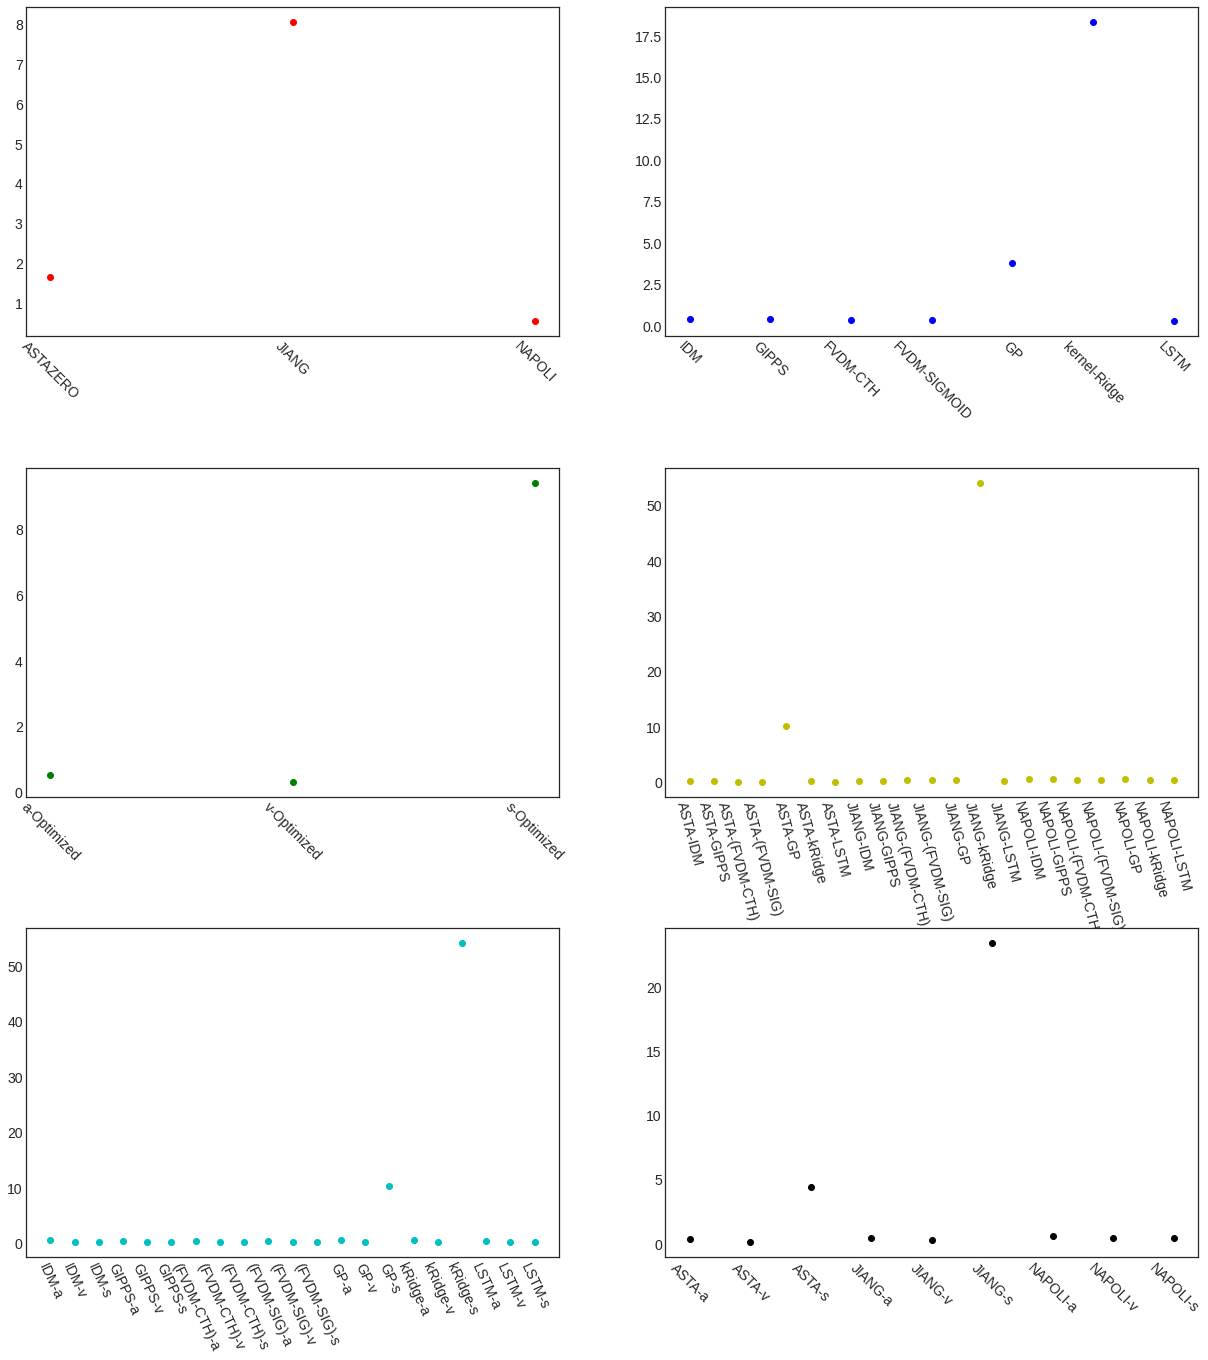

In [159]:
#df_anova.boxplot('Vel', by=['Data'])
fontSize = 14
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontSize)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Plotting names 
data_x = ['ASTAZERO', 'JIANG', 'NAPOLI']
algo_x = ['IDM', 'GIPPS', 'FVDM-CTH', 'FVDM-SIGMOID', 'GP', 'kernel-Ridge', 'LSTM']
opt_x = ['a-Optimized', 'v-Optimized', 's-Optimized']
data_algo_x = ['ASTA-IDM', 'ASTA-GIPPS', 'ASTA-(FVDM-CTH)', 'ASTA-(FVDM-SIG)', 'ASTA-GP', 'ASTA-kRidge', 'ASTA-LSTM',
               'JIANG-IDM', 'JIANG-GIPPS', 'JIANG-(FVDM-CTH)', 'JIANG-(FVDM-SIG)', 'JIANG-GP', 'JIANG-kRidge', 'JIANG-LSTM',
               'NAPOLI-IDM', 'NAPOLI-GIPPS', 'NAPOLI-(FVDM-CTH)', 'NAPOLI-(FVDM-SIG)', 'NAPOLI-GP', 'NAPOLI-kRidge', 'NAPOLI-LSTM']
algo_opt_x = ['IDM-a', 'IDM-v', 'IDM-s', 'GIPPS-a', 'GIPPS-v', 'GIPPS-s', '(FVDM-CTH)-a', '(FVDM-CTH)-v', 
              '(FVDM-CTH)-s', '(FVDM-SIG)-a', '(FVDM-SIG)-v', '(FVDM-SIG)-s', 'GP-a', 'GP-v', 'GP-s', 
              'kRidge-a', 'kRidge-v', 'kRidge-s', 'LSTM-a', 'LSTM-v', 'LSTM-s']
data_opt_x = ['ASTA-a', 'ASTA-v', 'ASTA-s', 'JIANG-a', 'JIANG-v', 'JIANG-s', 'NAPOLI-a', 'NAPOLI-v', 'NAPOLI-s']

aux_d = np.arange(len(data_algo_mean))

fig = plt.figure()
gs = fig.add_gridspec(3, 2, hspace=0.4)

(ax1, ax2), (ax3, ax4), (ax5, ax6) = gs.subplots()

fig.set_figheight(23)
fig.set_figwidth(21)

ax1.plot(data_x, data_mean, 'ro')
ax1.set_xticklabels(data_x, rotation=-45)
ax2.plot(algo_x, algo_mean, 'bo')
ax2.set_xticklabels(algo_x, rotation=-45)
ax3.plot(opt_x, opt_mean, 'go')
ax3.set_xticklabels(opt_x, rotation=-45)
ax4.plot(data_algo_x, data_algo_mean, 'yo')
#ax4.set_xticks(aux_d)
ax4.set_xticklabels(data_algo_x, rotation=-75)
ax5.plot(algo_opt_x, algo_opt_mean, 'co')
ax5.set_xticklabels(algo_opt_x, rotation=-65)
ax6.plot(data_opt_x, data_opt_mean, 'ko')
ax6.set_xticklabels(data_opt_x, rotation=-45)
#plt.savefig('ResearchUpdate#43/AllResults/Napoli_results.png')
plt.show()

/home/belal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:98: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/belal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:113: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/belal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:128: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/belal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:143: UserWarning: FixedFormatter should only be used together with FixedLocator


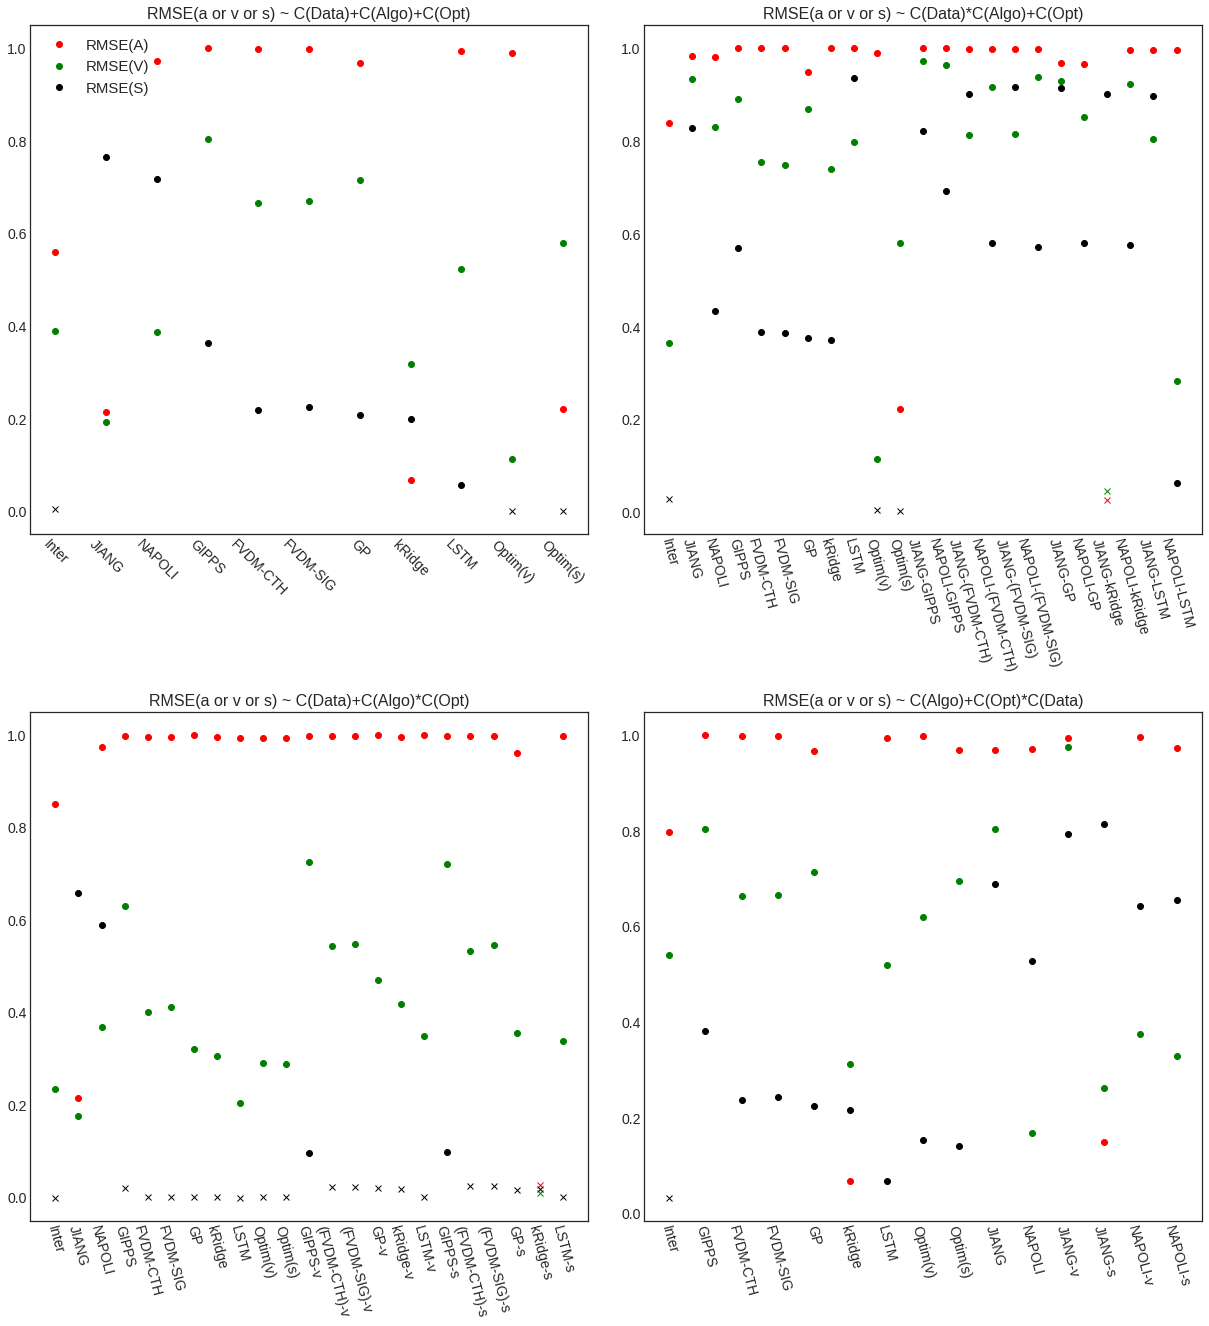

In [252]:
xTick_size = 14
yTick_size = 14
legend_size = 15
axes_size = 16
title_size = 16

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=axes_size)     # fontsize of the axes title
#plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=xTick_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=yTick_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=legend_size)    # legend fontsize
#plt.rc('figure', titlesize=title_size)  # fontsize of the figure title

# RMSE(A) p-Values
pValuesAllAccRMSE = np.array([0.62150177, 0.31783856, 0.86249397, 0.99981822, 0.99581914, 0.99554648, 0.72782157, 0.07036465, 0.99035695, 0.97566219, 0.16592862])
pValuesDataAlgoAccRMSE = np.array([0.82956836, 0.99288859, 0.98214375, 0.99936787, 0.9966813 , 0.99636524, 0.55142032, 0.99304661, 0.99650747, 0.97556798, 0.16550448, 0.99988825, 0.99899428, 0.99664761, 0.99854729, 0.99675936, 0.99899428, 0.67593356, 0.67501528, 0.02886579, 0.99139568, 0.99855847, 0.99699402])
pValuesAlgoOptAccRMSE = np.array([0.92588061, 0.32318015, 0.86381446, 0.99579063, 0.99173728, 0.99158138, 0.99516703, 0.99906458, 0.9893989, 0.98706061, 0.98659297, 0.99581089, 0.99415732, 0.99404708, 0.99790544, 0.99823616, 0.99670382, 0.99548017, 0.99338566, 0.9934959, 0.68055395, 0.03040733, 0.99250377])
pValuesDataOptAccRMSE = np.array([0.79911985, 0.99981956, 0.99584992, 0.99557926, 0.7297569, 0.07275938, 0.99042794, 0.9782028, 0.72073632, 0.99734022, 0.98475835, 0.99167421, 0.23255685, 0.99167421, 0.79373661])

# RMSE(V) p-Values 
pValuesAllVelRMSE = np.array([0.11120351, 0.5166703 , 0.68038313, 0.73542621, 0.51786126, 0.51821494, 0.6302017 , 0.50034231, 0.60555104, 0.0552497, 0.3642044])
pValuesDataAlgoVelRMSE = np.array([0.10801574, 0.5825999 , 0.84791985, 0.77257707, 0.51260084, 0.49988739, 0.72994183, 0.48675697, 0.58971628, 0.05593634, 0.36357907, 0.88359561, 0.95866886, 0.63283048, 0.90546949, 0.62757912, 0.8772101 , 0.82593425, 0.9370732 , 0.03495654, 0.88892289, 0.65737733, 0.1861266])
pValuesAlgoOptVelRMSE = np.array([0.04859001, 0.49391348, 0.66370789, 0.510829  , 0.21345648, 0.21598191, 0.16629907, 0.14814115, 0.27643021, 0.13735952, 0.13659592, 0.63352396, 0.36768713, 0.36843198, 0.31763712, 0.26403089, 0.41650417, 0.62889493, 0.35919141, 0.36582926, 0.18407524, 0.00645637, 0.40212667])
pValuesDataOptVelRMSE = np.array([0.14770879, 0.73356885, 0.51487322, 0.51522822, 0.62772721, 0.49729161, 0.60294908, 0.2998243, 0.41320115, 0.6543396, 0.38784657, 0.70254038, 0.17475411, 0.56392716, 0.45318225])

# RMSE(S) p-Values
pValuesAllHeadRMSE = np.array([1.74648106e-04, 4.52269703e-01, 5.13802732e-01, 2.67293256e-01, 1.19591766e-01, 1.21666553e-01, 1.09799449e-01, 1.04980969e-01, 9.62280576e-02, 7.30902363e-04, 5.87389019e-04])
pValuesDataAlgoHeadRMSE = np.array([0.00149652, 0.44489033, 0.12176622, 0.29598194, 0.11625483, 0.11339418, 0.1060324 , 0.10323772, 0.88082224, 0.00202829, 0.00168922, 0.81177944, 0.46140228, 0.59366852, 0.28417544, 0.57880534, 0.27719025, 0.57157697, 0.27572254, 0.57587817, 0.27156132, 0.96467605, 0.13061895])
pValuesAlgoOptHeadRMSE = np.array([3.88639555e-08, 2.26617397e-01, 2.92801963e-01, 2.83495185e-03, 5.51934927e-05, 5.59309015e-05, 3.19983455e-05, 3.06933520e-05, 5.63887995e-05, 2.98864069e-05, 3.00533844e-05, 2.86546737e-02, 2.46568320e-03, 2.40072808e-03, 1.96925644e-03, 1.76608173e-03, 4.67861794e-03, 2.99623847e-02, 2.70911078e-03, 2.71465938e-03, 1.54968441e-03, 1.81727241e-03, 2.71371130e-03])
pValuesDataOptHeadRMSE = np.array([2.89182057e-04, 2.80952651e-01, 1.30382549e-01, 1.32537315e-01, 1.20190255e-01, 1.15160529e-01, 1.05997414e-01, 8.75251822e-03, 6.87621213e-03, 2.08799893e-01, 3.19192580e-01, 3.88119990e-01, 3.57225120e-01, 5.18221291e-01, 4.86478993e-01])

# NRMSE(A) p-Values
pValuesAllAccNRMSE = np.array([0.56034316, 0.21410027, 0.97307462, 0.99998877, 0.99840384, 0.99823864, 0.96712459, 0.06729168, 0.99336102, 0.9885417, 0.2217966 ])
pValuesDataAlgoAccNRMSE = np.array([0.83766671, 0.98299406, 0.98059644, 0.99993252, 0.99964573, 0.99961199, 0.94918997, 0.99925773, 0.99962718, 0.98855117, 0.22317269, 0.99970958, 0.9995527 , 0.9987351 , 0.99753333, 0.99904937, 0.99771702, 0.96698691, 0.96541648, 0.02723471, 0.99683788, 0.99631876, 0.99634771])
pValuesAlgoOptAccNRMSE = np.array([0.85119091, 0.2161741 , 0.97313727, 0.99734047, 0.9964191 , 0.99635595, 0.99947782, 0.99555274, 0.99393916, 0.99287557, 0.99258334, 0.99724166, 0.99740482, 0.99739291, 0.99904908, 0.99627058, 0.99876374, 0.9971029 , 0.99694928, 0.99702907, 0.96189165, 0.02712405, 0.9964914])
pValuesDataOptAccNRMSE = np.array([0.79816686, 0.99998879, 0.99840576, 0.99824076, 0.96716428,0.06797753, 0.99336903, 0.99764744, 0.96920712, 0.96950095,0.97023662, 0.99443522, 0.14953238, 0.99653832, 0.97325743])

# NRMSE(V) p-Values 
pValuesAllVelNRMSE = np.array([0.38983994, 0.19263028, 0.38720388, 0.80489211, 0.66564917, 0.6694034 , 0.71612396, 0.31755372, 0.52367225, 0.11443619, 0.58014049])
pValuesDataAlgoVelNRMSE = np.array([0.36500012, 0.93301696, 0.83038849, 0.89078649, 0.75532657, 0.74811702, 0.86970163, 0.74058862, 0.79759501, 0.11536195, 0.57990919, 0.97220389, 0.96292646, 0.81373796, 0.91676404, 0.81413294, 0.93824784, 0.9283308 , 0.85087423, 0.04744341, 0.9216553 , 0.80419079, 0.28380843])
pValuesAlgoOptVelNRMSE = np.array([0.23426434, 0.17639412, 0.36867666, 0.6295325 , 0.40232456, 0.41113391, 0.32171309, 0.30722301, 0.20504754, 0.29048166, 0.28934892, 0.72495213, 0.54357798, 0.54849027, 0.47048937, 0.41905734, 0.34950492, 0.72086432, 0.53356682, 0.5463312, 0.35643749, 0.01101306, 0.33967056])
pValuesDataOptVelNRMSE = np.array([0.5411849 , 0.8031631 , 0.66283038, 0.66661135, 0.71367828, 0.31342201, 0.51999537, 0.61980652, 0.69586485, 0.80354818, 0.16945108, 0.97533812, 0.26309402, 0.37545603, 0.32888492])

# NRMSE(S) p-Values
pValuesAllHeadNRMSE = np.array([0.00475051, 0.76550789, 0.71659006, 0.36444415, 0.22009418, 0.22617248, 0.20829491, 0.20058649, 0.05836244, 0.00218141, 0.00189163])
pValuesDataAlgoHeadNRMSE = np.array([0.02915058, 0.82796837, 0.43382348, 0.56926607, 0.38945551, 0.38563146, 0.3755315 , 0.37159308, 0.93523616, 0.00459868, 0.00407011, 0.82253551, 0.6914647 , 0.90043001, 0.58120836, 0.91668664, 0.57232948, 0.91353843, 0.58039253, 0.90191659, 0.57681381, 0.89735142, 0.06411896])
pValuesAlgoOptHeadNRMSE = np.array([6.34120031e-05, 6.57968826e-01, 5.90132805e-01, 2.20003827e-02, 2.28153208e-03, 2.35108990e-03, 1.51334684e-03, 1.50280940e-03, 1.98612931e-05, 1.46299216e-03, 1.47142686e-03, 9.66397603e-02, 2.41711198e-02, 2.35081463e-02, 2.07188088e-02, 1.92689967e-02, 2.01369354e-03, 9.93630614e-02, 2.61417351e-02, 2.64383733e-02, 1.68158797e-02, 1.96996085e-02, 1.41325245e-03])
pValuesDataOptHeadNRMSE = np.array([0.03336181, 0.38237755, 0.2375679 , 0.24374458, 0.22555208, 0.21768306, 0.06828737, 0.15367702, 0.14068876, 0.68874319, 0.52881978, 0.79284904, 0.81369147, 0.64300294, 0.65573631])

pValuesAll_x = ['Inter', 'JIANG', 'NAPOLI', 'GIPPS', 'FVDM-CTH', 'FVDM-SIG', 'GP', 'kRidge', 'LSTM', 'Optim(v)', 'Optim(s)']
pValuesDataAlgo_x = ['Inter', 'JIANG', 'NAPOLI', 'GIPPS', 'FVDM-CTH', 'FVDM-SIG', 'GP', 'kRidge', 'LSTM', 'Optim(v)', 'Optim(s)',
                    'JIANG-GIPPS', 'NAPOLI-GIPPS', 'JIANG-(FVDM-CTH)', 'NAPOLI-(FVDM-CTH)', 'JIANG-(FVDM-SIG)', 
                    'NAPOLI-(FVDM-SIG)', 'JIANG-GP', 'NAPOLI-GP', 'JIANG-kRidge', 'NAPOLI-kRidge', 'JIANG-LSTM',
                    'NAPOLI-LSTM']
pValuesAlgoOpt_x = ['Inter', 'JIANG', 'NAPOLI', 'GIPPS', 'FVDM-CTH', 'FVDM-SIG', 'GP', 'kRidge', 'LSTM', 'Optim(v)', 'Optim(s)',
                    'GIPPS-v', '(FVDM-CTH)-v', '(FVDM-SIG)-v', 'GP-v', 'kRidge-v', 'LSTM-v', 'GIPPS-s', '(FVDM-CTH)-s',
                     '(FVDM-SIG)-s',  'GP-s', 'kRidge-s', 'LSTM-s'] 
pValuesDataOpt_x = ['Inter', 'GIPPS', 'FVDM-CTH', 'FVDM-SIG', 'GP', 'kRidge', 'LSTM', 'Optim(v)', 'Optim(s)', 'JIANG', 'NAPOLI',
                    'JIANG-v', 'JIANG-s', 'NAPOLI-v', 'NAPOLI-s']

pValuesAllAcc = np.copy(pValuesAllAccNRMSE)
pValuesDataAlgoAcc = np.copy(pValuesDataAlgoAccNRMSE)
pValuesAlgoOptAcc = np.copy(pValuesAlgoOptAccNRMSE) 
pValuesDataOptAcc = np.copy(pValuesDataOptAccNRMSE)

pValuesAllVel = np.copy(pValuesAllVelNRMSE)
pValuesDataAlgoVel = np.copy(pValuesDataAlgoVelNRMSE)
pValuesAlgoOptVel = np.copy(pValuesAlgoOptVelNRMSE)
pValuesDataOptVel = np.copy(pValuesDataOptVelNRMSE)

pValuesAllHead = np.copy(pValuesAllHeadNRMSE)
pValuesDataAlgoHead = np.copy(pValuesDataAlgoHeadNRMSE)
pValuesAlgoOptHead = np.copy(pValuesAlgoOptHeadNRMSE)
pValuesDataOptHead = np.copy(pValuesDataOptHeadNRMSE)

fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.1)

(ax1, ax2), (ax3, ax4) = gs.subplots()

fig.set_figheight(22)
fig.set_figwidth(21)

for i in range(len(pValuesAllAcc)):
    if pValuesAllAcc[i]>0.05:
       r1, = ax1.plot(pValuesAll_x[i], pValuesAllAcc[i], 'ro')
    else:
       r1, = ax1.plot(pValuesAll_x[i], pValuesAllAcc[i], 'rx')    
    if pValuesAllVel[i]>0.05:
       g1, = ax1.plot(pValuesAll_x[i], pValuesAllVel[i], 'go')
    else:
       g1, = ax1.plot(pValuesAll_x[i], pValuesAllVel[i], 'gx')
    if pValuesAllHead[i]>0.05:
       k1, = ax1.plot(pValuesAll_x[i], pValuesAllHead[i], 'ko')
    else:
       k1, = ax1.plot(pValuesAll_x[i], pValuesAllHead[i], 'kx')             
ax1.set_xticklabels(pValuesAll_x, rotation=-45)
ax1.set_title('RMSE(a or v or s) ~ C(Data)+C(Algo)+C(Opt)')
for i in range(len(pValuesDataAlgoAcc)):
    if pValuesDataAlgoAcc[i]>0.05:
       r1, = ax2.plot(pValuesDataAlgo_x[i], pValuesDataAlgoAcc[i], 'ro')
    else:
       r1, = ax2.plot(pValuesDataAlgo_x[i], pValuesDataAlgoAcc[i], 'rx')    
    if pValuesDataAlgoVel[i]>0.05:
       g1, = ax2.plot(pValuesDataAlgo_x[i], pValuesDataAlgoVel[i], 'go')
    else:
       g1, = ax2.plot(pValuesDataAlgo_x[i], pValuesDataAlgoVel[i], 'gx')
    if pValuesDataAlgoHead[i]>0.05:
       k1, = ax2.plot(pValuesDataAlgo_x[i], pValuesDataAlgoHead[i], 'ko')
    else:
       k1, = ax2.plot(pValuesDataAlgo_x[i], pValuesDataAlgoHead[i], 'kx')
ax2.set_xticklabels(pValuesDataAlgo_x, rotation=-75)
ax2.set_title('RMSE(a or v or s) ~ C(Data)*C(Algo)+C(Opt)')
for i in range(len(pValuesAlgoOptAcc)):
    if pValuesAlgoOptAcc[i]>0.05:
       r1, = ax3.plot(pValuesAlgoOpt_x[i], pValuesAlgoOptAcc[i], 'ro')
    else:
       r1, = ax3.plot(pValuesAlgoOpt_x[i], pValuesAlgoOptAcc[i], 'rx')    
    if pValuesAlgoOptVel[i]>0.05:
       g1, = ax3.plot(pValuesAlgoOpt_x[i], pValuesAlgoOptVel[i], 'go')
    else:
       g1, = ax3.plot(pValuesAlgoOpt_x[i], pValuesAlgoOptVel[i], 'gx')
    if pValuesAlgoOptHead[i]>0.05:
       k1, = ax3.plot(pValuesAlgoOpt_x[i], pValuesAlgoOptHead[i], 'ko')
    else:
       k1, = ax3.plot(pValuesAlgoOpt_x[i], pValuesAlgoOptHead[i], 'kx')
ax3.set_xticklabels(pValuesAlgoOpt_x, rotation=-75)
ax3.set_title('RMSE(a or v or s) ~ C(Data)+C(Algo)*C(Opt)')
for i in range(len(pValuesDataOptAcc)):
    if pValuesDataOptAcc[i]>0.05:
       r1, = ax4.plot(pValuesDataOpt_x[i], pValuesDataOptAcc[i], 'ro')
    else:
       r1, = ax4.plot(pValuesDataOpt_x[i], pValuesDataOptAcc[i], 'rx')    
    if pValuesDataOptVel[i]>0.05:
       g1, = ax4.plot(pValuesDataOpt_x[i], pValuesDataOptVel[i], 'go')
    else:
       g1, = ax4.plot(pValuesDataOpt_x[i], pValuesDataOptVel[i], 'gx')
    if pValuesDataOptHead[i]>0.05:
       k1, = ax4.plot(pValuesDataOpt_x[i], pValuesDataOptHead[i], 'ko')
    else:
       k1, = ax4.plot(pValuesDataOpt_x[i], pValuesDataOptHead[i], 'kx')
ax4.set_xticklabels(pValuesDataOpt_x, rotation=-75)
ax4.set_title('RMSE(a or v or s) ~ C(Algo)+C(Opt)*C(Data)')
ax1.legend((r1, g1, k1), ('RMSE(A)','RMSE(V)' ,'RMSE(S)'), loc='upper left', shadow=False)
#plt.savefig('ResearchUpdate#43/AllResults/NRMSE_pPlot.png')
plt.show()                 

# Normalized RMSE

In [127]:
df_NRMSE_ASTA = pd.read_csv('Data/ASTAZERO/dataVehicle1.csv', header=None,low_memory=False, encoding='UTF-8')
df_NRMSE_JIANG = pd.read_csv('Data/JIANG/dataVehicle101.csv', header=None,low_memory=False, encoding='UTF-8')
df_NRMSE_NAPOLI = pd.read_csv('Data/NAPOLI/dataVehicle1.csv', header=None,low_memory=False, encoding='UTF-8')
df_NRMSE_ASTA = df_NRMSE_ASTA.rename(columns={0:"TIME",1:"LEAD_POS",2:"FOLLOW_POS",3:"LEAD_VEL",4:"FOLLOW_VEL",5:"LEAD_LENGTH"})
df_NRMSE_JIANG = df_NRMSE_JIANG.rename(columns={0:"TIME",1:"LEAD_POS",2:"FOLLOW_POS",3:"LEAD_VEL",4:"FOLLOW_VEL",5:"LEAD_LENGTH"})
df_NRMSE_NAPOLI = df_NRMSE_NAPOLI.rename(columns={0:"TIME",1:"LEAD_POS",2:"FOLLOW_POS",3:"LEAD_VEL",4:"FOLLOW_VEL",5:"LEAD_LENGTH"})
df_NRMSE_ASTA = pd.DataFrame(df_NRMSE_ASTA)
df_NRMSE_JIANG = pd.DataFrame(df_NRMSE_JIANG)
df_NRMSE_NAPOLI = pd.DataFrame(df_NRMSE_NAPOLI)
print(df_NRMSE_ASTA)

         TIME      LEAD_POS    FOLLOW_POS  LEAD_VEL  FOLLOW_VEL  LEAD_LENGTH
0         1.0   4466.914835   4458.758374  0.021174    0.007862        5.196
1         1.1   4466.916899   4458.759248  0.020108    0.009621        5.196
2         1.2   4466.918861   4458.760291  0.019126    0.011245        5.196
3         1.3   4466.920728   4458.761491  0.018225    0.012739        5.196
4         1.4   4466.922510   4458.762833  0.017404    0.014105        5.196
...       ...           ...           ...       ...         ...          ...
11752  1176.2  27440.670420  27431.138280  0.042988    0.011987        5.196
11753  1176.3  27440.674690  27431.139230  0.042337    0.006957        5.196
11754  1176.4  27440.678880  27431.139640  0.041571    0.001273        5.196
11755  1176.5  27440.682990  27431.139710  0.040687    0.000000        5.196
11756  1176.6  27440.687010  27431.139710  0.039682    0.000000        5.196

[11757 rows x 6 columns]


In [128]:
############ Converting Python DataFrames to Numpy Arrays for ASTA ############

t_ASTA = np.asarray(df_NRMSE_ASTA["TIME"])
leadPos_ASTA = np.asarray(df_NRMSE_ASTA['LEAD_POS']) # Leading vehicle position 
followPos_ASTA = np.asarray(df_NRMSE_ASTA['FOLLOW_POS']) # Follow vehicle position 
vlead_ASTA = np.asarray(df_NRMSE_ASTA['LEAD_VEL']) # Leading vehicle velocity
v_ASTA = np.asarray(df_NRMSE_ASTA['FOLLOW_VEL']) # Follow vehicle velocity
leadLen_ASTA = np.asarray(df_NRMSE_ASTA["LEAD_LENGTH"]) # lead vehicle length 
leadVehLen_ASTA = df_NRMSE_ASTA.iat[0,5]
s_ASTA = leadPos_ASTA - followPos_ASTA - leadLen_ASTA[0]
#dt = t[1] - t[0]
dt = 0.1

sCheck_ASTA = s_ASTA<=0   # making sure that it is positive 
vehLen_ASTA = leadLen_ASTA!=5.196000000000001  # check if all the vehicles have the same length 
print(np.count_nonzero(vehLen_ASTA)) # count the number of True 
print(np.count_nonzero(sCheck_ASTA)) # count number of True 

statTrajec_ASTA = int(0.8*len(v_ASTA))
endTrajec_ASTA = -1

#t = np.linspace(0, 288.4, 2884, endpoint=False)  # 188.9 for NAPOLI # 288.4 for JIANG
t_ASTA = t_ASTA[statTrajec_ASTA:endTrajec_ASTA]

# Without Scaling 
v_ASTA = v_ASTA[statTrajec_ASTA:endTrajec_ASTA]
s_ASTA = s_ASTA[statTrajec_ASTA:endTrajec_ASTA]
vlead_ASTA = vlead_ASTA[statTrajec_ASTA:endTrajec_ASTA]

followPos_ASTA = followPos_ASTA[statTrajec_ASTA:endTrajec_ASTA]
leadPos_ASTA = leadPos_ASTA[statTrajec_ASTA:endTrajec_ASTA]
print(len(v_ASTA))

############ Calculating the Follower Derivative ############

FD = ps.SmoothedFiniteDifference()
v_p_ASTA = FD(v_ASTA, t_ASTA) #HDWY Derivative #(670,1)
v_p_ASTA = np.reshape(v_p_ASTA, (v_ASTA.size,)) #(670,)

11757
0
2351


In [129]:
############ Converting Python DataFrames to Numpy Arrays for JIANG ############

t_JIANG = np.asarray(df_NRMSE_JIANG["TIME"])
leadPos_JIANG = np.asarray(df_NRMSE_JIANG['LEAD_POS']) # Leading vehicle position 
followPos_JIANG = np.asarray(df_NRMSE_JIANG['FOLLOW_POS']) # Follow vehicle position 
vlead_JIANG = np.asarray(df_NRMSE_JIANG['LEAD_VEL']) # Leading vehicle velocity
v_JIANG = np.asarray(df_NRMSE_JIANG['FOLLOW_VEL']) # Follow vehicle velocity
leadLen_JIANG = np.asarray(df_NRMSE_JIANG["LEAD_LENGTH"]) # lead vehicle length 
leadVehLen_JIANG = df_NRMSE_JIANG.iat[0,5]
s_JIANG = leadPos_JIANG - followPos_JIANG - leadLen_JIANG[0]
#dt = t[1] - t[0]
dt = 0.1

sCheck_JIANG = s_JIANG<=0   # making sure that it is positive 
vehLen_JIANG = leadLen_JIANG!=5.196000000000001  # check if all the vehicles have the same length 
print(np.count_nonzero(vehLen_JIANG)) # count the number of True 
print(np.count_nonzero(sCheck_JIANG)) # count number of True 

statTrajec_JIANG = int(0.8*len(v_JIANG))
endTrajec_JIANG = -1

#t = np.linspace(0, 288.4, 2884, endpoint=False)  # 188.9 for NAPOLI # 288.4 for JIANG
t_JIANG = t_JIANG[statTrajec_JIANG:endTrajec_JIANG]

# Without Scaling 
v_JIANG = v_JIANG[statTrajec_JIANG:endTrajec_JIANG]
s_JIANG = s_JIANG[statTrajec_JIANG:endTrajec_JIANG]
vlead_JIANG = vlead_JIANG[statTrajec_JIANG:endTrajec_JIANG]

followPos_JIANG = followPos_JIANG[statTrajec_JIANG:endTrajec_JIANG]
leadPos_JIANG = leadPos_JIANG[statTrajec_JIANG:endTrajec_JIANG]
print(len(v_JIANG))

############ Calculating the Follower Derivative ############

FD = ps.SmoothedFiniteDifference()
v_p_JIANG = FD(v_JIANG, t_JIANG) #HDWY Derivative #(670,1)
v_p_JIANG = np.reshape(v_p_JIANG, (v_JIANG.size,)) #(670,)

2885
0
576


In [130]:
############ Converting Python DataFrames to Numpy Arrays for NAPOLI ############

t_NAPOLI = np.asarray(df_NRMSE_NAPOLI["TIME"])
leadPos_NAPOLI = np.asarray(df_NRMSE_NAPOLI['LEAD_POS']) # Leading vehicle position 
followPos_NAPOLI = np.asarray(df_NRMSE_NAPOLI['FOLLOW_POS']) # Follow vehicle position 
vlead_NAPOLI = np.asarray(df_NRMSE_NAPOLI['LEAD_VEL']) # Leading vehicle velocity
v_NAPOLI = np.asarray(df_NRMSE_NAPOLI['FOLLOW_VEL']) # Follow vehicle velocity
leadLen_NAPOLI = np.asarray(df_NRMSE_NAPOLI["LEAD_LENGTH"]) # lead vehicle length 
leadVehLen_NAPOLI = df_NRMSE_NAPOLI.iat[0,5]
s_NAPOLI = leadPos_NAPOLI - followPos_NAPOLI - leadLen_NAPOLI[0]
#dt = t[1] - t[0]
dt = 0.1

sCheck_NAPOLI = s_NAPOLI<=0   # making sure that it is positive 
vehLen_NAPOLI = leadLen_NAPOLI!=5.196000000000001  # check if all the vehicles have the same length 
print(np.count_nonzero(vehLen_NAPOLI)) # count the number of True 
print(np.count_nonzero(sCheck_NAPOLI)) # count number of True 

statTrajec_NAPOLI = int(0.8*len(v_NAPOLI))
endTrajec_NAPOLI = -1

#t = np.linspace(0, 288.4, 2884, endpoint=False)  # 188.9 for NAPOLI # 288.4 for JIANG
t_NAPOLI = t_NAPOLI[statTrajec_NAPOLI:endTrajec_NAPOLI]

# Without Scaling 
v_NAPOLI = v_NAPOLI[statTrajec_NAPOLI:endTrajec_NAPOLI]
s_NAPOLI = s_NAPOLI[statTrajec_NAPOLI:endTrajec_NAPOLI]
vlead_NAPOLI = vlead_NAPOLI[statTrajec_NAPOLI:endTrajec_NAPOLI]

followPos_NAPOLI = followPos_NAPOLI[statTrajec_NAPOLI:endTrajec_NAPOLI]
leadPos_NAPOLI = leadPos_NAPOLI[statTrajec_NAPOLI:endTrajec_NAPOLI]
print(len(v_NAPOLI))

############ Calculating the Follower Derivative ############

FD = ps.SmoothedFiniteDifference()
v_p_NAPOLI = FD(v_NAPOLI, t_NAPOLI) #HDWY Derivative #(670,1)
v_p_NAPOLI = np.reshape(v_p_NAPOLI, (v_NAPOLI.size,)) #(670,)

1889
0
377


In [131]:
df_anova_A = pd.read_csv('ResearchUpdate#43/AllResults/anovaData/anovaAcc.csv', header=None, sep=',', low_memory=False, encoding='UTF-8')
df_anova_A = df_anova_A.rename(columns={0:"Vel",1:"Data",2:"Algo",3:"Opt"})
df_anova_A = pd.DataFrame(df_anova_A)

df_anova_V = pd.read_csv('ResearchUpdate#43/AllResults/anovaData/anovaVel.csv', header=None, sep=',', low_memory=False, encoding='UTF-8')
df_anova_V = df_anova_V.rename(columns={0:"Vel",1:"Data",2:"Algo",3:"Opt"})
df_anova_V = pd.DataFrame(df_anova_V)

df_anova_S = pd.read_csv('ResearchUpdate#43/AllResults/anovaData/anovaHead.csv', header=None, sep=',', low_memory=False, encoding='UTF-8')
df_anova_S = df_anova_S.rename(columns={0:"Vel",1:"Data",2:"Algo",3:"Opt"})
df_anova_S = pd.DataFrame(df_anova_S)

def RMSEbyGroup(frame1, factor1, array1, array2, array3):
    factor_groups = frame1.groupby([factor1])
    dict = {}
    for values, group in factor_groups:
        fact_group = np.asanyarray(group['Vel'])
        if values==1: dict[values] = fact_group / np.sqrt(np.mean(array1**2))
        if values==2: dict[values] = fact_group / np.sqrt(np.mean(array2**2))
        if values==3: dict[values] = fact_group / np.sqrt(np.mean(array3**2))
    return dict

In [132]:
RMSE_a = RMSEbyGroup(df_anova_A, 'Data', v_p_ASTA, v_p_JIANG, v_p_NAPOLI)
RMSE_v = RMSEbyGroup(df_anova_V, 'Data', v_ASTA, v_JIANG, v_NAPOLI)
RMSE_s = RMSEbyGroup(df_anova_S, 'Data', s_ASTA, s_JIANG, s_NAPOLI)

RMSE_a_full = np.concatenate((RMSE_a[1],RMSE_a[2],RMSE_a[3]))
RMSE_v_full = np.concatenate((RMSE_v[1],RMSE_v[2],RMSE_v[3]))
RMSE_s_full = np.concatenate((RMSE_s[1],RMSE_s[2],RMSE_s[3]))

np.savetxt('ResearchUpdate#43/AllResults/anovaData/anovaAccNRMSE.csv', RMSE_a_full)
np.savetxt('ResearchUpdate#43/AllResults/anovaData/anovaVelNRMSE.csv', RMSE_v_full)
np.savetxt('ResearchUpdate#43/AllResults/anovaData/anovaHeadNRMSE.csv', RMSE_s_full)